In [1]:
import xarray as xr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [3]:
dat = xr.open_dataset('../07/01/O_L2_0021_GCWNS_2017182100224_v1.0.nc')

In [4]:
dat

<xarray.Dataset>
Dimensions:                                            (tp_x: 65, tp_y: 3302, x: 4032, y: 3302)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: tp_x, tp_y, x, y
Data variables:
    metadata                                           int8 ...
    pixel_classif_flags                                (y, x) int16 ...
    quality_flags                                      (y, x) uint32 ...
    rtoa_1                                             (y, x) float32 ...
    rtoa_2                                             (y, x) float32 ...
    rtoa_3                                             (y, x) float32 ...
    rtoa_4                                             (y, x) float32 ...
    rtoa_5                                             (y, x) float32 ...
    rtoa_6                                             (y, x) float32 ...
    rtoa

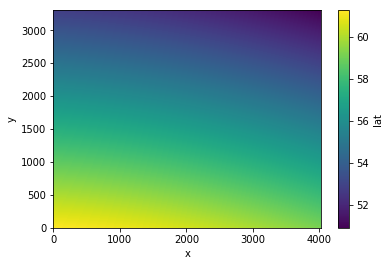

In [10]:
dat.lat.plot.imshow()

In [ ]:
dat.rtoa_12.plot()


In [11]:
res = dat.chl_lov_bourgneuf.data
ma_res = np.ma.array(res, mask =np.isnan(res))
vmin = None
vmax = None

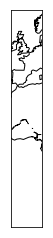

In [12]:
fig = plt.figure()
#ax = fig.add_axes([0.05,0.05,0.9,0.9])
#m = Basemap(projection='kav7',lon_0=54.,resolution='c')
m = Basemap(projection='merc',llcrnrlat=-45,urcrnrlat=65,\
            llcrnrlon=-10,urcrnrlon=10,lat_ts=2,resolution='c')

x,y = m(dat.lon.data,dat.lat.data)
m.drawcoastlines()
#m.drawmapboundary(fill_color='0.3')
ccmap = plt.cm.jet
#ccmap.set_bad("gray",1.)
im = m.pcolor(y,x,res,cmap=ccmap)


In [ ]:
plt.imshow(res)

In [ ]:

x,y = m(dat.lon.data,dat.lat.data)

In [ ]:
x.